In [2]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# read the dataset into df from csv
df = pd.read_csv('all_data.csv')

#print(df.head()) -> explore the first few rows
print(df.info()) # explore the dataset details
#print(df.dtypes)

print(df.columns)

#See how many duplicated values are in the dataset
duplicates = df.duplicated()
print(duplicates.value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB
None
Index(['Country', 'Year', 'Life expectancy at birth (years)', 'GDP'], dtype='object')
False    96
dtype: int64


In [3]:
#rename the columns
df.rename(columns = {'Country':'country','Year':'year','Life expectancy at birth (years)':'life_expentancy','GDP':'gdp'}, inplace = True)
print(df.columns)
print(df.dtypes)
#print(df.head())
#print(df.country.value_counts())
#print(df.year.value_counts())
#see how many datapoints have by countries
print(df.groupby('country').year.count())
#see how many datapoints have by years
print(df.year.value_counts())



Index(['country', 'year', 'life_expentancy', 'gdp'], dtype='object')
country             object
year                 int64
life_expentancy    float64
gdp                float64
dtype: object
country
Chile                       16
China                       16
Germany                     16
Mexico                      16
United States of America    16
Zimbabwe                    16
Name: year, dtype: int64
2000    6
2001    6
2002    6
2003    6
2004    6
2005    6
2006    6
2007    6
2008    6
2009    6
2010    6
2011    6
2012    6
2013    6
2014    6
2015    6
Name: year, dtype: int64


                     country  year  life_expentancy           gdp
64  United States of America  2000             76.8  1.030000e+13
65  United States of America  2001             76.9  1.060000e+13
66  United States of America  2002             77.0  1.100000e+13
67  United States of America  2003             77.2  1.150000e+13
68  United States of America  2004             77.5  1.230000e+13
69  United States of America  2005             77.5  1.310000e+13
70  United States of America  2006             77.8  1.390000e+13
71  United States of America  2007             78.1  1.450000e+13
72  United States of America  2008             78.2  1.470000e+13
73  United States of America  2009             78.5  1.440000e+13
74  United States of America  2010             78.7  1.500000e+13
75  United States of America  2011             78.7  1.550000e+13
76  United States of America  2012             78.8  1.620000e+13
77  United States of America  2013             78.9  1.670000e+13
78  United

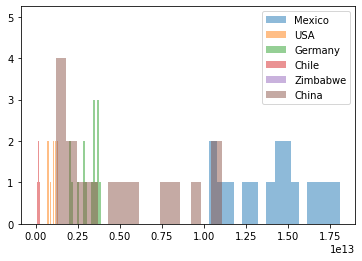

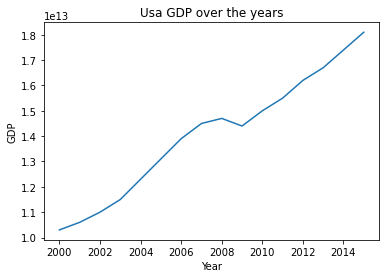

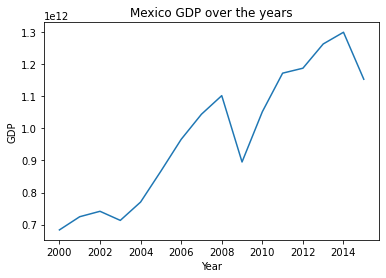

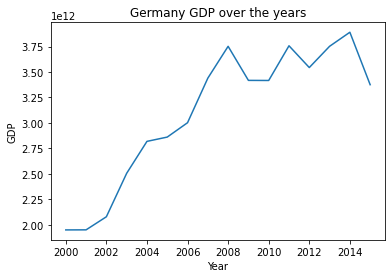

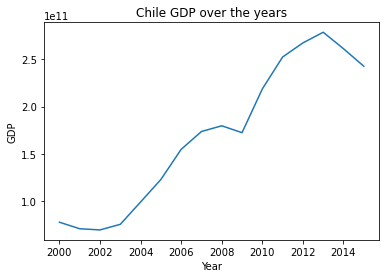

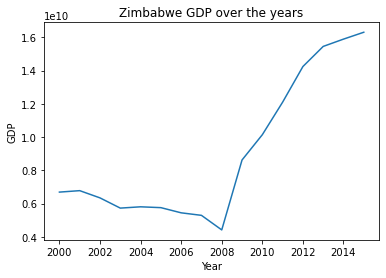

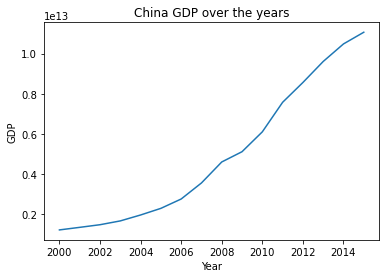

<Figure size 432x288 with 0 Axes>

In [4]:
#create other dataframes with each countries
df_mexico = df[df.country == 'Mexico']
df_usa = df[df.country == 'United States of America']
df_germany = df[df.country == 'Germany']
df_chile = df[df.country == 'Chile']
df_zimb = df[df.country == 'Zimbabwe']
df_china = df[df.country == 'China']
print(df_usa)
print(df_china)
print(df_mexico)

#view the gdp distribution by country in a histogram
plt.hist(df_usa.gdp, bins = 16, alpha = 0.5)
plt.hist(df_mexico.gdp, bins = 16, alpha = 0.5)
plt.hist(df_germany.gdp, bins = 16, alpha = 0.5)
plt.hist(df_chile.gdp, bins = 16, alpha = 0.5)
plt.hist(df_zimb.gdp, bins = 16, alpha = 0.5)
plt.hist(df_china.gdp, bins = 16, alpha = 0.5)
plt.legend(['Mexico', 'USA','Germany', 'Chile', 'Zimbabwe', 'China'])
plt.show()
plt.clf()

#gdp evolution from year to year by country

plt.plot(df_usa.year, df_usa.gdp)
plt.title("Usa GDP over the years")
plt.xlabel('Year')
plt.ylabel('GDP')
plt.show()
plt.clf()

plt.plot(df_mexico.year, df_mexico.gdp)
plt.title('Mexico GDP over the years')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.show()
plt.clf()

plt.plot(df_germany.year, df_germany.gdp)
plt.title('Germany GDP over the years')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.show()
plt.clf()

plt.plot(df_chile.year, df_chile.gdp)
plt.title('Chile GDP over the years')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.show()
plt.clf()

plt.plot(df_zimb.year, df_zimb.gdp)
plt.title('Zimbabwe GDP over the years')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.show()
plt.clf()

plt.plot(df_china.year, df_china.gdp)
plt.title('China GDP over the years')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.show()
plt.clf()


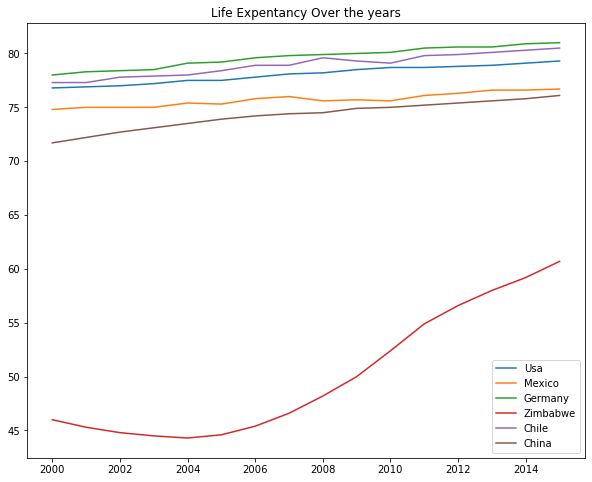

<Figure size 432x288 with 0 Axes>

In [5]:
#Life expentancy by country in the examined period

plt.figure(figsize = (10,8))
plt.plot(df_usa.year, df_usa['life_expentancy'])
plt.plot(df_mexico.year, df_mexico['life_expentancy'])
plt.plot(df_germany.year, df_germany['life_expentancy'])
plt.plot(df_zimb.year, df_zimb['life_expentancy'])
plt.plot(df_chile.year, df_chile['life_expentancy'])
plt.plot(df_china.year, df_china['life_expentancy'])
plt.legend(['Usa', 'Mexico', 'Germany', 'Zimbabwe', 'Chile', 'China'])
plt.title('Life Expentancy Over the years')


plt.show()
plt.clf()

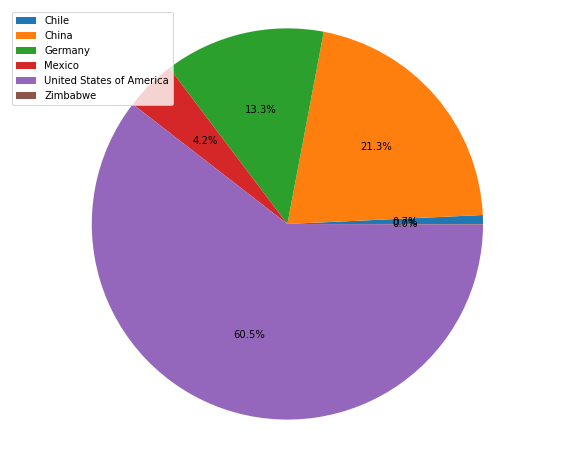

<Figure size 432x288 with 0 Axes>

In [6]:
import statsmodels.api as sm
#all dataset gdp distribution
t = df.groupby('country').gdp.sum()
plt.figure(figsize = (10, 8))
plt.pie(t, autopct = '%0.1f%%')
plt.legend(['Chile', 'China', 'Germany', 'Mexico', 'United States of America', 'Zimbabwe'], loc = 2)
plt.axis('equal')
plt.show()
plt.clf()

country
Chile                       78.94375
China                       74.26250
Germany                     79.65625
Mexico                      75.71875
United States of America    78.06250
Zimbabwe                    50.09375
Name: life_expentancy, dtype: float64


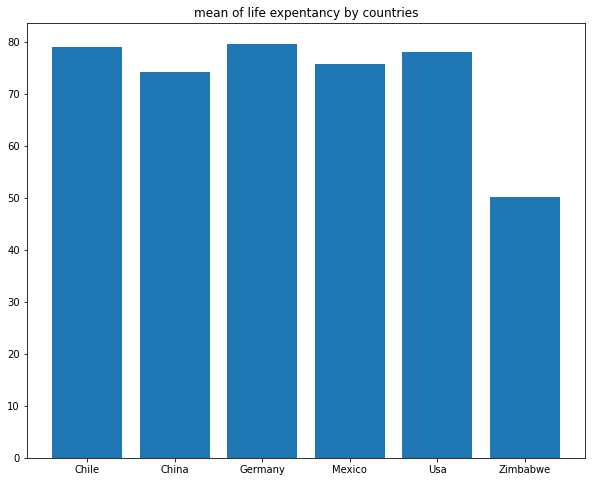

<Figure size 432x288 with 0 Axes>

In [7]:
#mean of life expentancy by countries
life_exp_mean = []
life_exp_mean = df.groupby('country').life_expentancy.mean()
print(life_exp_mean)
plt.figure(figsize=(10,8))
ax = plt.subplot()
plt.bar(range(len(life_exp_mean)), life_exp_mean)
ax.set_xticks(range(len(life_exp_mean)))
ax.set_xticklabels(['Chile', 'China', 'Germany', 'Mexico', 'Usa', 'Zimbabwe'])
plt.title('mean of life expentancy by countries')

plt.show()
plt.clf()

Index(['country', 'year', 'life_expentancy', 'gdp'], dtype='object')


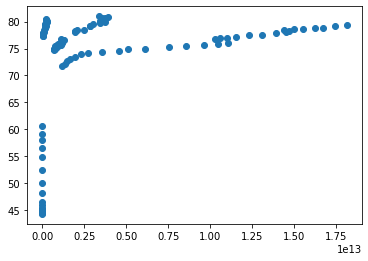

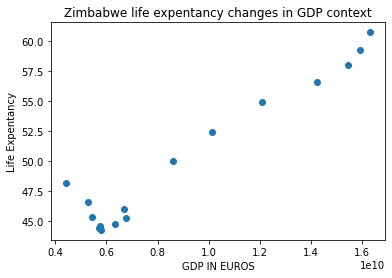

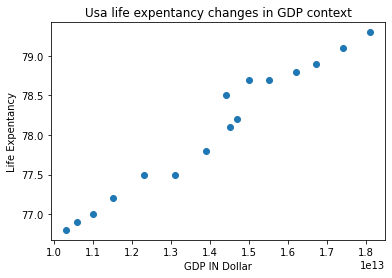

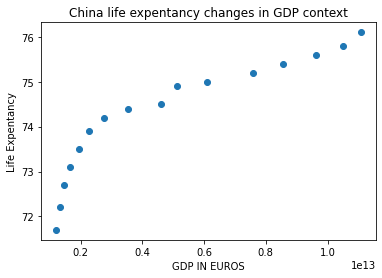

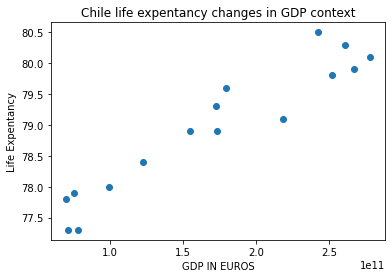

<function matplotlib.pyplot.clf()>

In [8]:
print(df.columns)
plt.scatter(x = df.gdp, y = df.life_expentancy)
plt.show()
plt.clf()

plt.scatter(x = df_zimb.gdp, y = df_zimb.life_expentancy)
plt.xlabel('GDP IN EUROS')
plt.ylabel('Life Expentancy')
plt.title("Zimbabwe life expentancy changes in GDP context")
plt.show()
plt.clf

plt.scatter(x = df_usa.gdp, y = df_usa.life_expentancy)
plt.xlabel('GDP IN Dollar')
plt.ylabel('Life Expentancy')
plt.title("Usa life expentancy changes in GDP context")
plt.show()
plt.clf

plt.scatter(x = df_china.gdp, y = df_china.life_expentancy)
plt.xlabel('GDP IN EUROS')
plt.ylabel('Life Expentancy')
plt.title("China life expentancy changes in GDP context")
plt.show()
plt.clf

plt.scatter(x = df_chile.gdp, y = df_chile.life_expentancy)
plt.xlabel('GDP IN EUROS')
plt.ylabel('Life Expentancy')
plt.title("Chile life expentancy changes in GDP context")
plt.show()
plt.clf

Intercept    7.005478e+01
gdp          7.047546e-13
dtype: float64


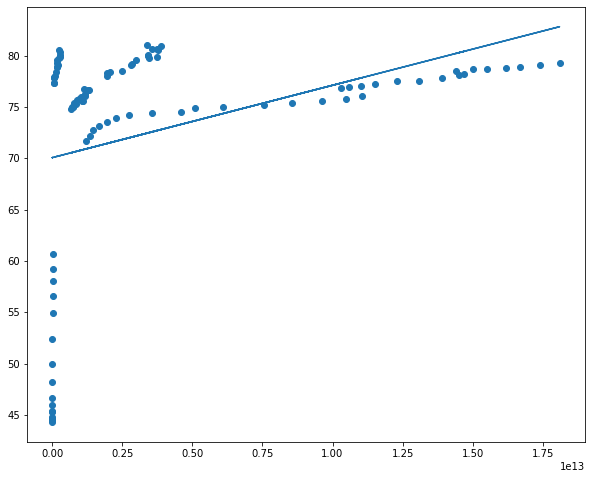

In [13]:
import statsmodels.api as sm
model = sm.OLS.from_formula('life_expentancy ~ gdp', df)
results = model.fit()
print(results.params)
plt.figure(figsize= (10, 8))
plt.scatter(x = df.gdp, y = df.life_expentancy)
plt.plot(df.gdp, results.params[0] + results.params[1] * df.gdp)
plt.show()


Intercept    3.799250e+01
gdp          1.335299e-09
dtype: float64


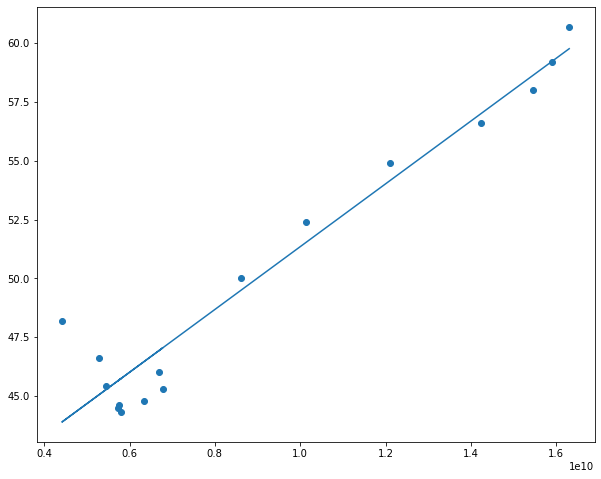

In [14]:
model = sm.OLS.from_formula('life_expentancy ~ gdp', data = df_zimb)
results = model.fit()
print(results.params)
plt.figure(figsize= (10, 8))
plt.scatter(x = df_zimb.gdp, y = df_zimb.life_expentancy)
plt.plot(df_zimb.gdp, results.params[0] + results.params[1] * df_zimb.gdp)
plt.show()

#In the context of the linear regression model you provided, the coefficient 1.335299e-09 represents the estimated change in the response variable (life expectancy) for a one unit increase in the predictor variable (GDP), measured in billions of dollars. So, for example, if GDP increases by 1 billion dollars, the model predicts that life expectancy would increase by 1.335299e-09 units, or approximately 1.34 seconds.